### Here, we explore the mushrooms dataset before we proceed to transforming the variables. 

In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [57]:
# Importing dataset
cattle = pd.read_csv('Data/_Raw/global_cattle_milk_yield_prediction_dataset.csv')
cattle
df = cattle.copy()

In [40]:
df.shape

(250000, 37)

In [42]:
df.columns 

Index(['Cattle_ID', 'Breed', 'Region', 'Country', 'Climate_Zone',
       'Management_System', 'Age_Months', 'Weight_kg', 'Parity',
       'Lactation_Stage', 'Days_in_Milk', 'Feed_Type', 'Feed_Quantity_kg',
       'Feeding_Frequency', 'Water_Intake_L', 'Walking_Distance_km',
       'Grazing_Duration_hrs', 'Rumination_Time_hrs', 'Resting_Hours',
       'Ambient_Temperature_C', 'Humidity_percent', 'Season', 'Housing_Score',
       'FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine',
       'Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine',
       'Previous_Week_Avg_Yield', 'Body_Condition_Score',
       'Milking_Interval_hrs', 'Date', 'Farm_ID', 'Milk_Yield_L'],
      dtype='object')

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Months,250000.0,83.450064,34.642854,24.0,53.00,83.00,113.00,143.00
Weight_kg,250000.0,500.118658,144.458104,250.0,374.80,500.40,625.50,750.00
Parity,250000.0,3.500152,1.706973,1.0,2.00,3.00,5.00,6.00
Days_in_Milk,250000.0,182.277176,105.104091,1.0,91.00,182.00,273.00,364.00
Feed_Quantity_kg,250000.0,12.015175,3.959998,3.0,9.30,12.00,14.70,25.00
Feeding_Frequency,250000.0,3.000660,1.412508,1.0,2.00,3.00,4.00,5.00
Water_Intake_L,250000.0,65.074433,19.699541,20.0,51.50,65.00,78.50,120.00
Walking_Distance_km,250000.0,4.037237,1.927741,0.5,2.66,4.01,5.35,12.00
Grazing_Duration_hrs,250000.0,6.053517,2.867527,1.0,4.00,6.00,8.00,14.00
Rumination_Time_hrs,250000.0,8.010312,1.953905,4.0,6.60,8.00,9.30,14.00


In [83]:
categorical_variables = df.dtypes[df.dtypes.values == 'object'].index.to_list()
numerical_variables = df.dtypes[df.dtypes.values != 'object'].index.to_list()

In [55]:
df[categorical_variables].describe()

,Cattle_ID,Breed,Region,Country,Climate_Zone,Management_System,Lactation_Stage,Feed_Type,Season,Date,Farm_ID
count,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000
unique,250000,40,6,15,6,5,3,8,5,1095,1000
top,CATTLE_000001,Red_Poll_Africa,Oceania,ET,Temperate,Intensive,Mid,Dry_Fodder,Summer,2024-03-16,FARM_0937
freq,1,6439,41837,16892,41987,50322,100008,31569,50293,274,296


In [ ]:
health_features = ['FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine','Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine']
df.drop (columns = health_features, inplace = True)


KeyError: "['FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine', 'Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine'] not found in axis"

In [ ]:
# Defining explanatory variables and target variable
y = df['Milk_Yield_L'] 
X = df.drop(columns = ['Milk_Yield_L'])

In [ ]:
# Verifying there are no missing values
df.isna().sum()

Cattle_ID                  0
Breed                      0
Region                     0
Country                    0
Climate_Zone               0
Management_System          0
Age_Months                 0
Weight_kg                  0
Parity                     0
Lactation_Stage            0
Days_in_Milk               0
Feed_Type                  0
Feed_Quantity_kg           0
Feeding_Frequency          0
Water_Intake_L             0
Walking_Distance_km        0
Grazing_Duration_hrs       0
Rumination_Time_hrs        0
Resting_Hours              0
Ambient_Temperature_C      0
Humidity_percent           0
Season                     0
Housing_Score              0
Previous_Week_Avg_Yield    0
Body_Condition_Score       0
Milking_Interval_hrs       0
Date                       0
Farm_ID                    0
Milk_Yield_L               0
dtype: int64

#### Let's start exploring our data by focusing on our target: Milk_Yield_L 

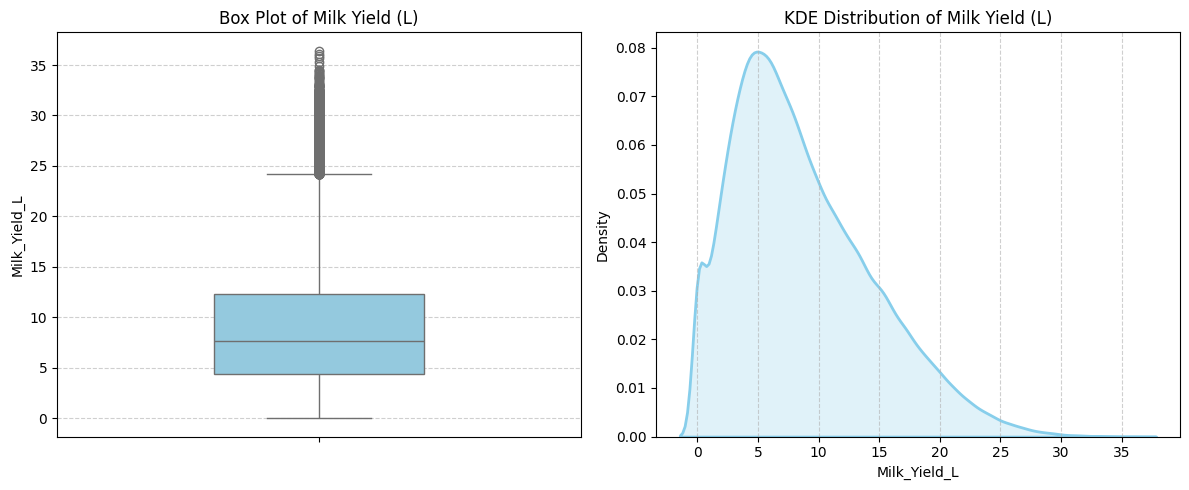

In [81]:
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="Milk_Yield_L", color="skyblue", width=0.4)
plt.title("Box Plot of Milk Yield (L)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Milk_Yield_L", fill=True, color="skyblue", linewidth=2)
plt.title("KDE Distribution of Milk Yield (L)")
plt.grid(True, axis = 'x', linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

In [85]:
numerical_variables

['Age_Months',
 'Weight_kg',
 'Parity',
 'Days_in_Milk',
 'Feed_Quantity_kg',
 'Feeding_Frequency',
 'Water_Intake_L',
 'Walking_Distance_km',
 'Grazing_Duration_hrs',
 'Rumination_Time_hrs',
 'Resting_Hours',
 'Ambient_Temperature_C',
 'Humidity_percent',
 'Housing_Score',
 'Previous_Week_Avg_Yield',
 'Body_Condition_Score',
 'Milking_Interval_hrs',
 'Milk_Yield_L']

/var/folders/xb/zq2zrn694mx618hvx_c05zzr0000gn/T/ipykernel_47828/2935795544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


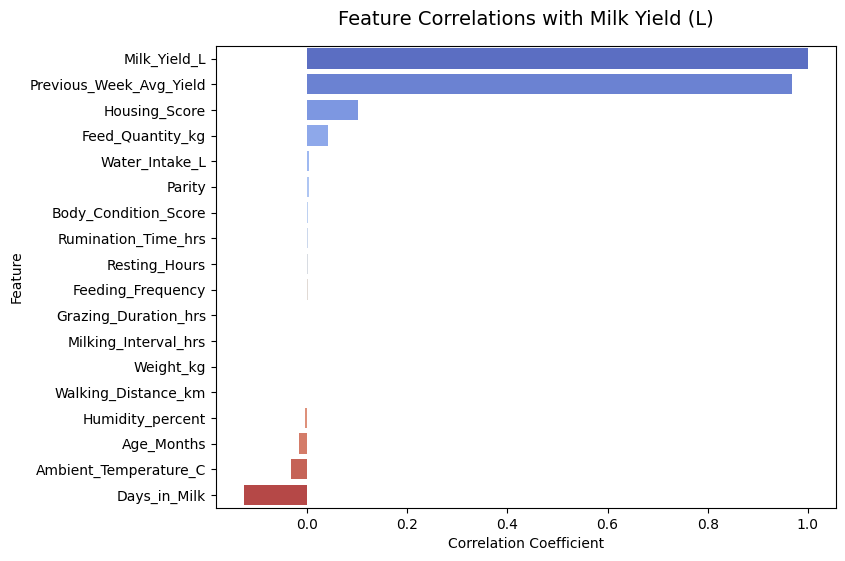

In [90]:
corr_matrix = df.corr(numeric_only=True)

# Display correlations between all variables and the target
target_corr = corr_matrix['Milk_Yield_L'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Feature Correlations with Milk Yield (L)", fontsize=14, pad=15)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()